<div style="overflow: hidden; width: 100%; height: 50%;">
    <img style="transform: translateY(-50%);" src="images/banner_snowflake.jpg"/>
</div>
<div style="padding-right: 50px;">
<p style="font-size: 30px; font-weight: 600; color: #002553; margin-top:-50px;" class="toc_title">Team Snowflake's Submission for the CAIIC AI Competition</p><br>
<p style="font-size: 15px; color: #474747">Hello!
This is Team Snowflake's final submission for the CAIIC AI Competition on 1st November 2020. 
<br><br> 
The distribution network is the last level of grid for power users, and the distribution station area bordered by the geographical power supply area of the distribution transformer isan important basic unit in the operation and maintenance of the distribution network.
<br><br>     
The operating status of distribution transformers largely determines the quality of power supply in the area. During the
operation of the distribution transformer, “heavy overload” of the distribution transformer may occur. The long-term heavy load or overload state of the distribution transformer will reduce the life of the equipment and also bring the risk of equipment failure, causing power outages, and unnecessary economic losses to both the power company and users.
<br><br>        
Participants were provided with a data source of monitoring data of distribution network transformers in a
certain city. The training set is the data from May 2015 to May 2018, and the test set is the data from
June 2018 to October 2018. Including: distribution transformer number, rated capacity, data date,
distribution transformer type, maximum temperature, minimum temperature, user number, user name,
terminal address, energy meter asset number, current transformer, voltage transformer, 24 point
operating load Value, Whether to heavy overload (data may not be fully used).
<br><br>    
Partcipants are required to predict whether heavy overloads will occur in the future of the distribution transformer (June 2018-October 2018).
<br><br>   
This kernel documents Team Snowflake's thinking, analysis and approach in building the model.
</p>
</div>

<div id="Table of Contents">
    <br>
<h1 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title">Table of Contents</h1><br>
    <ul class="toc_list">
        <li style="color: #474747; margin-bottom: 20px;">1<a style="text-decoration: none; color: #068abc" href="#1.-Prerequisites"> Prerequisites</a>
          <ul style="margin-top: 3px;">
            <li>1.1<a style="text-decoration: none; color: #068abc" href="#1.1-Load-Libraries"> Load libraries</a></li>
          </ul>
        </li>
        <li style="color: #474747; margin-bottom: 20px;">2<a style="text-decoration: none; color: #068abc" href="#2.-Dataset"> Dataset</a>
            <ul style="margin-top: 3px;">
                <li style=" margin-bottom: 4px;">2.1<a style="text-decoration: none; color: #068abc;" href="#2.1-Read-dataset"> Read dataset</a></li>
                <li>2.2<a style="text-decoration: none; color: #068abc" href="#2.2-Rename-columns"> Rename columns</a></li>
            </ul>
        </li>
        <li style="color: #474747; margin-bottom: 20px;">3<a style="text-decoration: none;color: #068abc" href="#3.-EDA"> Exploratory Data Analysis</a>
            <ul style="margin-top: 3px;">
                <li style=" margin-bottom: 4px;">3.1<a style="text-decoration: none; color: #068abc;" href="#3.1-Examining-dataset"> Examining dataset</a>
                    <ul style="margin-top: 3px;">
                        <li style="margin-top: 3px; margin-bottom: 4px;">3.1.1<a style="text-decoration: none; color: #068abc;" href="#3.1.1-Shape-of-dataset"> Shape of dataset</a></li>
                        <li style="margin-bottom:4px;">3.1.2<a style="text-decoration: none; color: #068abc;" href="#3.1.2-Preview-dataset"> Preview dataset</a></li>
                        <li style="margin-bottom:4px;">3.1.3<a style="text-decoration: none; color: #068abc;" href="#3.1.3-Summary-of-dataset"> Summary of dataset</a></li>
                        <li style="margin-bottom:4px;">3.1.4<a style="text-decoration: none; color: #068abc;" href="#3.1.4-Summary-statistics-of-dataset"> Summary statistics of dataset</a></li>
                        <li style="margin-bottom:4px;">3.1.5<a style="text-decoration: none; color: #068abc;" href="#3.1.5-Check-for-imbalanced-data"> Check for imbalanced data</a></li>
                        <li style="margin-bottom:4px;">3.1.6<a style="text-decoration: none; color: #068abc;" href="#3.1.5-Check-for-outliers"> Check for outliers</a></li>
                        <li>3.1.7<a style="text-decoration: none; color: #068abc;" href="#3.1.5-Check-for-missing-values"> Check for missing values</a></li>
                    </ul>
                </li>
                <li style="margin-bottom: 4px; margin-top: 10px;">3.2<a style="text-decoration: none; color: #068abc;" href="#3.2-Time-Series"> Time Series</a>
                    <ul style="margin-top: 3px;">
                        <li style="margin-top: 3px; margin-bottom: 4px;">3.2.1<a style="text-decoration: none; color: #068abc;" href="#3.2.1-Checking-for-seasonality-changes"> Checking for seasonality changes</a></li>
                        <li>3.2.2<a style="text-decoration: none; color: #068abc;" href="#3.2.2-Checking-for-daily-changes"> Checking for daily changes</a></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li style="color: #474747; margin-bottom: 20px;">4<a style="text-decoration: none;color: #068abc" href="#4.-Feature-Engineering"> Feature Engineering</a>
            <ul style="margin-top: 3px;">
                <li style="margin-bottom: 4px;">4.1<a style="text-decoration: none; color: #068abc;" href="#4.1-Feature-Construction"> Feature Construction</a></li>
                <li style=" margin-bottom: 4px;">4.2<a style="text-decoration: none; color: #068abc;" href="#4.2-Dimensionality-Reduction"> Dimensionality Reduction</a>
                    <ul style="margin-top: 3px;">
                        <li>4.2.1<a style="text-decoration: none; color: #068abc; margin-top: 3px;" href="#4.2.1-Remove-unrelated-features"> Remove unrelated features</a></li>
                    </ul>
                </li>
                <li style="margin-bottom: 4px; margin-top: 10px;">4.3<a style="text-decoration: none; color: #068abc;" href="#4.3-Data-Cleansing"> Data Cleansing</a>
                    <ul style="margin-top: 3px;">
                        <li style="margin-top: 3px; margin-bottom: 4px;">4.3.1<a style="text-decoration: none; color: #068abc;" href="#4.3.1-Handling-outliers-with-Robust-Scaling"> Handling outliers with Robust Scaling</a></li>
                        <li style="margin-bottom: 4px;">4.3.2<a style="text-decoration: none; color: #068abc;" href="#4.3.2-Handling-missing-values-with-Imputation"> Handling missing values with Imputation</a></li>
                        <li style="margin-bottom: 4px;">4.3.3<a style="text-decoration: none; color: #068abc;" href="#4.3.3-Categorical-encoding-with-OHE"> Categorical encoding with OHE</a></li>
                        <li>4.3.4<a style="text-decoration: none; color: #068abc;" href="#4.3.4-Handling-imbalanced-data-with-OneSidedSelection"> Handling imbalanced data with OneSidedSelection</a></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li style="color: #474747; margin-bottom: 20px;">5<a style="text-decoration: none;color: #068abc" href="#5.-Training-Model"> Training Model</a>
            <ul style="margin-top: 3px;">
                <li style=" margin-bottom: 4px;">5.1<a style="text-decoration: none; color: #068abc;" href="#5.1-Introduction-to-the-XGBoost-Algorithm"> Introduction to the XGBoost Algorithm</a>
                    <ul style="margin-top: 3px;">
                        <li style="margin-top: 3px; margin-bottom: 4px;">5.1.1<a style="text-decoration: none; color: #068abc;" href="#5.1.1-Tree-based-algorithms"> Tree-based algorithms</a></li>
                        <li style="margin-bottom:4px;">5.1.2<a style="text-decoration: none; color: #068abc;" href="#5.1.2-Bagging-vs-Boosting"> Bagging vs Boosting</a></li>
                        <li style="margin-bottom:4px;">5.1.3<a style="text-decoration: none; color: #068abc;" href="#5.1.3-Gradient-Boosting"> Gradient Boosting</a></li>
                        <li>5.1.4<a style="text-decoration: none; color: #068abc;" href="#5.1.4-Extreme-Gradient-Boosting-(XGBoost)"> Extreme Gradient Boosting (XGBoost)</a></li>
                    </ul>
                </li>
                <li style="margin-bottom: 4px; margin-top: 10px;">5.2<a style="text-decoration: none; color: #068abc;" href="#5.2-Implementing-XGBoost-in-Python"> Implementing XGBoost in Python</a>
                    <ul style="margin-top: 3px;">
                        <li style="margin-top: 3px; margin-bottom: 4px;">5.2.1<a style="text-decoration: none; color: #068abc;" href="#5.2.1-Train-the-XGBoost-Classifier"> Train the XGBoost Classifier</a></li>
                        <li style="margin-bottom: 4px;">5.2.2<a style="text-decoration: none; color: #068abc;" href="#5.2.2-Hold-out-Validation-with-XGBoost-Classifier"> Hold-out Validation with XGBoost Classifier</a></li>
                        <li>5.2.3<a style="text-decoration: none; color: #068abc;" href="#5.2.3-Check-analysis-report"> Check analysis report</a></li>
                    </ul>
                </li>
                <li style="margin-bottom: 4px; margin-top: 10px;">5.3<a style="text-decoration: none; color: #068abc;" href="#5.3-k-fold-Cross-Validation-using-XGBoost"> k-fold Cross Validation using XGBoost</a></li>
                <li style=" margin-bottom: 4px;">5.4<a style="text-decoration: none; color: #068abc;" href="#5.4-Introduction-to-Bayesian-Optimisation"> Introduction to Bayesian Optimisation</a>
                    <ul style="margin-top: 3px;">
                        <li style="margin-top: 3px; margin-bottom: 4px;">5.4.1<a style="text-decoration: none; color: #068abc;" href="#5.4.1-Hyperparameter-Tuning"> Hyperparameter Tuning</a></li>
                        <li style="margin-bottom:4px;">5.4.2<a style="text-decoration: none; color: #068abc;" href="#5.4.2-Frequentist-vs-Bayesian"> Frequentist vs Bayesian</a></li>
                        <li>5.4.3<a style="text-decoration: none; color: #068abc;" href="#5.4.2-Frequentist-vs-Bayesian"> Bayesian Optimisation</a></li>
                    </ul>
                </li>
                <li style="margin-bottom: 4px; margin-top: 10px;">5.5<a style="text-decoration: none; color: #068abc;" href="#5.5-Implementing-BayesOpt-in-Python"> Implementing BayesOpt in Python</a>
                    <ul style="margin-top: 3px;">
                        <li style="margin-top: 3px;">5.5.1<a style="text-decoration: none; color: #068abc;" href="#5.5.1--Setting-up-BayesOpt"> Setting up BayesOpt</a></li>
                    </ul>
                </li>
                <li style=" margin-bottom: 4px; margin-top: 10px;">5.6<a style="text-decoration: none; color: #068abc;" href="#5.6-Final-Validation"> Final Validation</a>
                    <ul style="margin-top: 3px;">
                        <li style="margin-top: 3px; margin-bottom: 4px;">5.6.1<a style="text-decoration: none; color: #068abc;" href="#5.6.1--Hold-out-Validation-with-XGBoost-and-BayesOpt"> Hold-out Validation with XGBoost and BayesOpt</a></li>
                        <li style="margin-bottom:4px;">5.6.2<a style="text-decoration: none; color: #068abc;" href="#5.6.2--Check-analysis-report"> Check analysis report</a></li>
                        <li>5.6.3<a style="text-decoration: none; color: #068abc;" href="#5.6.3--Feature-importance-with-XGBoost"> Feature importance with XGBoost</a></li>
                    </ul>
                </li>
            </ul>
        </li>
        <li style="color: #474747; margin-bottom: 20px;">6<a style="text-decoration: none;color: #068abc" href="#6.-Predictions"> Predictions</a>
            <ul style="margin-top: 3px;">
                <li style=" margin-bottom: 4px;">6.1<a style="text-decoration: none; color: #068abc;" href="#6.1-Predicting-with-our-final-model"> Predicting with our final model</a>
                    <ul style="margin-top: 3px;">
                        <li>6.2.1<a style="text-decoration: none; color: #068abc; margin-top: 3px;" href="#6.6.1--Saving-our-model"> Saving our model</a></li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>

<br><br><br><br>
<div style="background-color: #005284; padding-left: 20px; padding-top: 5px; padding-bottom: 30px;">
    <h1 style="font-size: 55px; color:#dbe2eb;"><span style="opacity: 0.3;">1.</span> Prerequisites</h1>
</div>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">1.1</span> Load Libraries</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br>

In [1]:
## Data Plotting and Visualisation
from matplotlib import pyplot as plt # for plotting facilities
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV File I/O 
import graphviz
%matplotlib inline
sns.set_style("white")


## Preprocessing
from sklearn.impute import SimpleImputer # deals with missing values
from sklearn.model_selection import train_test_split # to split the dataset to training and validation sets
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import OneSidedSelection # undersampling with tomek links and CNN


## Gradient Boosting with XGBoost
import xgboost as xgb
from xgboost import XGBClassifier


## Hyperparamter Tuning w/ Bayesian Optimisation
from bayes_opt import BayesianOptimization


## Scikit Learn's Metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score

<br><br><br><br><br><br>
<div style="background-color: #005284; padding-left: 20px; padding-top: 5px; padding-bottom: 30px;">
<h1 style="font-size: 55px; color:#dbe2eb;"><span style="opacity: 0.3;">2.</span> Dataset</h1>
</div>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">2.1</span> Read dataset</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br>

In [2]:
# Load train dataset
df = pd.read_csv('train_set.csv', parse_dates=['DDate'])

# Load test dataset
pred_df = pd.read_csv('test_set.csv', parse_dates=['DDate'])

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">2.2</span> Rename columns</h2><br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br>

In [3]:
df = df.rename(columns={'Is_gz': 'Target'})

<br><br><br><br><br><br>
<div style="background-color: #005284; padding-left: 20px; padding-top: 5px; padding-bottom: 30px;">
<h1 style="font-size: 55px; color:#dbe2eb;"><span style="opacity: 0.3;">3.</span> EDA</h1>
</div>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.1</span> Examining dataset</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br><br>


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.1.1</span> Shape of dataset</h2><br>

<ul style="font-size: 15px; color: #474747">
    <li>It is always a good habit to determine how much data we're working with by checking the shape of the dataset.
</ul>
<br>

In [4]:
df.shape

(354288, 38)

<br>
<p style="font-size: 15px; color: #474747">From the analysis we can tell that there are 354,288 observations and 38 features. This is not a relatively large dataset but may require some computational time.</p>

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.1.2</span> Preview dataset</h2><br>
<br>

In [5]:
df.head(3)

,ID,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Target
0,1,MPB_331,400,2015-05-11,Column transformer,21.6,8.0,T00_58,Name_1,1300261,...,28.96,41.38,95.32,77.67,96.03,99.44,61.69,43.12,26.81,0
1,2,MPB_331,400,2015-05-12,Column transformer,29.7,15.1,T00_58,Name_1,1300261,...,32.97,29.66,89.26,66.02,86.62,105.64,64.61,50.58,34.98,0
2,3,MPB_331,400,2015-05-14,Column transformer,27.2,18.4,T00_58,Name_1,1300261,...,36.31,36.33,71.37,94.70,109.50,88.24,63.66,46.20,34.15,0


<br>
<ul style="font-size: 15px; color: #474747">
    <li>First looking at the <code>Target</code> variable, it consists of the values 0 and 1.</li>
    <li style="margin-top: 10px;">These two values classify the transformers on whether they are 
        <ul style="margin-top: 8px;">
            <li>0 for not overloaded</li>
            <li style="margin-top: 5px;">1 for overloaded</li>
        </ul>
    </li>
    <li style="margin-top: 10px;">Interestingly, they also provided us the <code>DDate</code> recorded. Normally, time series is used for regression and forecasting but time series classification is definitely a possibility.</li>
    <li style="margin-top: 10px;">There are also a number of irrelevant features such as <code>UserNumber</code> and <code>UserName</code>. The objective is to find whether a transformer has overloaded based on its own features and not if a specific user is more likely to overload a transformer. It is also not practical to base the model on external features due to its inflexibility.</li>
</ul>

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.1.3</span> Summary of dataset</h2><br>
<br>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354288 entries, 0 to 354287
Data columns (total 38 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ID          354288 non-null  int64         
 1   DTNumber    354288 non-null  object        
 2   Volume      354288 non-null  int64         
 3   DDate       354288 non-null  datetime64[ns]
 4   DType       354288 non-null  object        
 5   MaxTemp     352977 non-null  float64       
 6   MinTemp     352977 non-null  float64       
 7   UserNumber  354288 non-null  object        
 8   UserName    354288 non-null  object        
 9   Terminal    354288 non-null  int64         
 10  EMANumber   354288 non-null  object        
 11  CT          354288 non-null  int64         
 12  PT          354288 non-null  int64         
 13  A0          354288 non-null  float64       
 14  A1          354288 non-null  float64       
 15  A2          354288 non-null  float64       
 16  A3

<br>
<ul style="font-size: 15px; color: #474747">
    <li>The dataset contains a mix of categorical, numerical and date variables.</li>
    <li style="margin-top: 10px;">Most models don't work too well with categorical variables so some data cleansing might be required.</li>
</ul>

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.1.4</span> Summary statistics of dataset</h2><br>
<br>

In [7]:
df.describe().apply(lambda x: round(x, 1))

,ID,Volume,MaxTemp,MinTemp,Terminal,CT,PT,A0,A1,A2,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Target
count,354288.0,354288.0,352977.0,352977.0,354288.0,354288.0,354288.0,354288.0,354288.0,354288.0,...,354288.0,354288.0,354288.0,354288.0,354288.0,354288.0,354288.0,354288.0,354288.0,354288.0
mean,177144.5,718.1,19.7,10.2,1042996.6,251.0,1.0,47.8,40.9,37.6,...,53.2,54.1,59.5,71.0,78.0,80.4,80.8,75.0,60.7,0.0
std,102274.3,435.0,11.1,10.7,484621.6,162.9,0.0,45.7,40.5,38.0,...,50.6,51.0,55.1,64.8,69.6,70.3,70.5,66.4,55.6,0.1
min,1.0,50.0,-7.3,-14.5,130011.0,0.0,0.0,-189.1,-243.4,-248.4,...,-239.2,-231.7,-239.6,-235.2,-232.0,-248.3,-234.5,-240.0,-251.0,0.0
25%,88572.8,315.0,9.7,-0.3,1300112.0,100.0,1.0,17.2,14.7,13.5,...,19.2,19.7,21.6,25.9,28.0,29.0,28.9,26.8,22.0,0.0
50%,177144.5,630.0,21.7,11.5,1300212.0,200.0,1.0,37.7,31.6,28.7,...,41.8,43.0,47.8,57.6,64.6,67.9,68.7,62.7,49.4,0.0
75%,265716.2,1250.0,29.5,20.0,1300302.0,400.0,1.0,64.4,54.3,49.4,...,71.7,73.4,81.7,98.0,108.6,112.3,113.5,105.1,83.8,0.0
max,354288.0,2000.0,39.5,27.7,1300396.0,800.0,1.0,696.6,589.0,543.7,...,692.1,631.6,704.5,780.9,894.3,910.6,960.0,1003.8,847.8,1.0


<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.1.5</span> Check for imbalanced data</h2>
<br>

<ul style="font-size: 15px; color: #474747">
    <li>Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.</li>
    <li style="margin-top: 10px;">They are common and expected in real world applications, especially in cancer detection and credit card fraudulations, where the "Positive" class occurs much rarely. </li>
<br>

0    352844
1      1444
Name: Target, dtype: int64

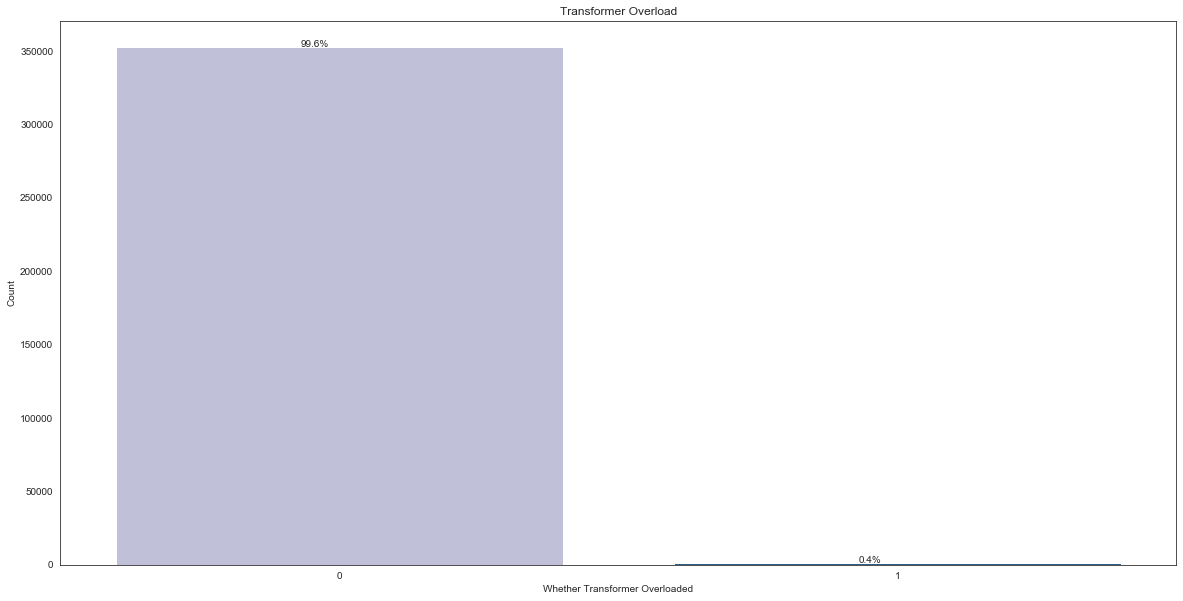

In [8]:
fig0 = plt.figure(figsize=(20, 10))
ax0 = sns.countplot(x='Target', data=df, palette=["#bcbddc", "#236194"])
ax0.set_title('Transformer Overload')
ax0.set_ylabel('Count')
ax0.set_xlabel('Whether Transformer Overloaded')

total = len(df['Target'])
for p in ax0.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        x = p.get_x() + p.get_width()/2 - 0.07
        y = p.get_y() + p.get_height()
        ax0.annotate(percentage, (x, y))
        
fig0.savefig('images/plots/boxplot_outlier.png')
df['Target'].value_counts()

<br>
<p style="font-size: 15px; color: #474747">We can tell that there's a clear imbalance between the two classes. From our experience, as long as there's a class below 50% of the others, it is considered imbalanced.</p>

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.1.5</span> Check for outliers</h2>
<br>

<ul style="font-size: 15px; color: #474747">
    <li>An outlier is an unlikely observation in a dataset and may have one of many causes. It is rare, or distinct, or does not fit in some way.</li>
    <li style="margin-top: 10px;">Outliers can have many causes, such a
        <ul style="margin-top: 8px;">
            <li>Measurement or input error.</li>
            <li style="margin-top: 5px;">Data corruption.</li>
            <li style="margin-top: 5px;">True outlier observation.</li>
        </ul>
    </li>
    <li style="margin-top: 10px;">Machine learning algorithms are sensitive to the range and distribution of attribute values. Data outliers can spoil and mislead the training process resulting in longer training times, less accurate models and ultimately poorer results.</li>
<br>

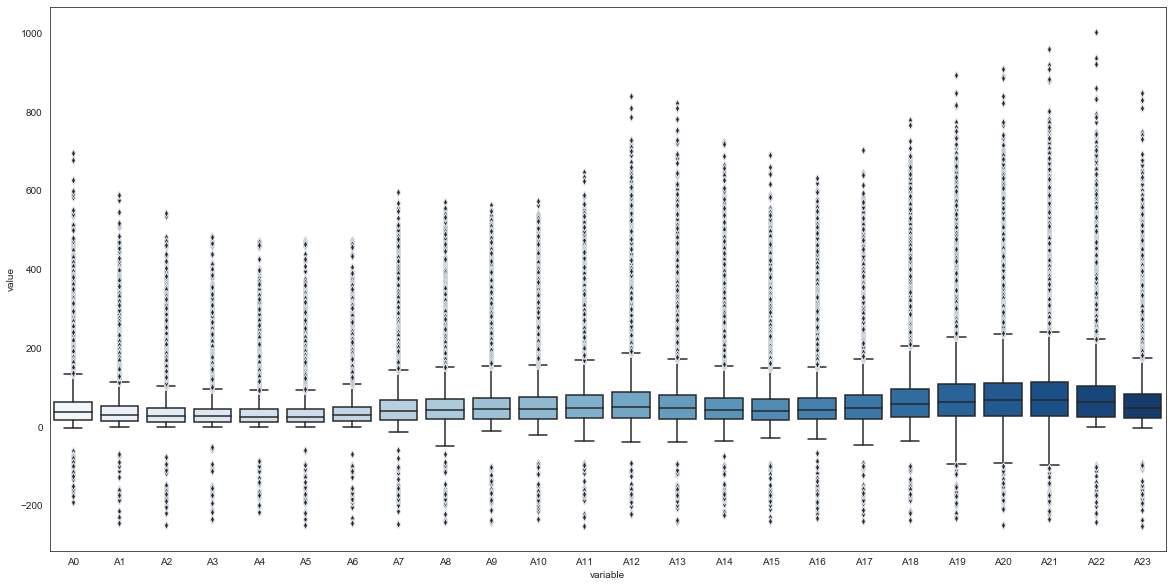

In [9]:
# set figure size
fig1 = plt.figure(figsize=(20, 10))

# combine all operating load values into one stack
df_opload = df[['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 
              'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
              'A21', 'A22', 'A23']]
df_opload = pd.melt(df_opload)

# plot boxplot
ax1 = sns.boxplot(x='variable', y='value', data=df_opload, palette="Blues", flierprops=dict(color='#236194', markeredgecolor='#dbe2eb'))

fig1.savefig('images/plots/boxplot_outlier.png')

<br><br>

In [10]:
# tabular way with IQR
def check_outliers(df):
    
    outliers = pd.DataFrame(index=['Observations', 'Lower Fence', 'Upper Fence', '(%)Below', '(%)Above', '(%)Outliers'])
    
    for col in df.columns:
        
        if df[col].dtype not in [object, '<M8[ns]']: 
            
            # calculating IQR and lower&upper fence
            obs = df[col].size
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_fence = Q1 - 1.5*IQR
            upper_fence = Q3 + 1.5*IQR
        
            # outliers that are below lower fence
            outlier_below_count = (df[col] < lower_fence).sum()
            outlier_below_pct = outlier_below_count/obs * 100
            format_below = f'{outlier_below_pct:.2f}% ({outlier_below_count}/{obs})'
            
            # outliers that are above upper fence
            outlier_above_count = (df[col] > upper_fence).sum()
            outlier_above_pct = outlier_above_count/obs * 100
            format_above = f'{outlier_above_pct:.2f}% ({outlier_above_count}/{obs})'
            
            # total no. of outliers
            outlier_count = outlier_below_count + outlier_above_count
            outlier_pct = outlier_count/obs * 100
            format_outlier = f'{outlier_pct:.2f}% ({outlier_count}/{obs})'
            
            # fit info into respective index
            outliers[col] = [obs, lower_fence, upper_fence, format_below, format_above, format_outlier]
            
    return outliers
    
outliers = check_outliers(df)
display(outliers)

,ID,Volume,MaxTemp,MinTemp,Terminal,CT,PT,A0,A1,A2,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Target
Observations,354288,354288,354288,354288,354288,354288,354288,354288,354288,354288,...,354288,354288,354288,354288,354288,354288,354288,354288,354288,354288
Lower Fence,-177142,-1087.5,-20,-30.75,1.29983e+06,-350,1,-53.6162,-44.6,-40.48,...,-59.42,-60.875,-68.655,-82.31,-92.9,-96.0987,-98.105,-90.7687,-70.74,0
Upper Fence,531432,2652.5,59.2,50.45,1.30059e+06,850,1,135.274,113.64,103.36,...,150.34,153.885,171.945,206.25,229.5,237.391,240.495,222.641,176.46,0
(%)Below,0.00% (0/354288),0.00% (0/354288),0.00% (0/354288),0.00% (0/354288),21.98% (77886/354288),0.00% (0/354288),0.02% (55/354288),0.01% (26/354288),0.01% (26/354288),0.01% (26/354288),...,0.01% (26/354288),0.01% (26/354288),0.01% (26/354288),0.01% (26/354288),0.01% (24/354288),0.01% (25/354288),0.01% (25/354288),0.01% (26/354288),0.01% (26/354288),0.00% (0/354288)
(%)Above,0.00% (0/354288),0.00% (0/354288),0.00% (0/354288),0.00% (0/354288),0.00% (0/354288),0.00% (0/354288),0.00% (0/354288),5.08% (18015/354288),5.70% (20191/354288),5.96% (21098/354288),...,5.09% (18033/354288),4.90% (17371/354288),4.46% (15785/354288),4.08% (14453/354288),3.58% (12695/354288),3.34% (11832/354288),3.10% (10977/354288),3.23% (11454/354288),4.00% (14186/354288),0.41% (1444/354288)
(%)Outliers,0.00% (0/354288),0.00% (0/354288),0.00% (0/354288),0.00% (0/354288),21.98% (77886/354288),0.00% (0/354288),0.02% (55/354288),5.09% (18041/354288),5.71% (20217/354288),5.96% (21124/354288),...,5.10% (18059/354288),4.91% (17397/354288),4.46% (15811/354288),4.09% (14479/354288),3.59% (12719/354288),3.35% (11857/354288),3.11% (11002/354288),3.24% (11480/354288),4.01% (14212/354288),0.41% (1444/354288)


<br>
<p style="font-size: 15px; color: #474747">There seems to be a significant number of outliers in the operating load values. We also have to remember to exclude the 0 values recorded later from the outliers as they are most likely days when the transformer is not operating.</p>

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.1.5</span> Check for missing values</h2>
<br>

<ul style="font-size: 15px; color: #474747">
    <li>The real-world data often has a lot of missing values.</li>
    <li style="margin-top: 10px;">The cause of missing values can be due to
        <ul style="margin-top: 8px;">
            <li>Data corruption.</li>
            <li style="margin-top: 5px;">Failure to record data.</li>
        </ul>
    </li>
    <li style="margin-top: 10px;">The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.</li>
<br>

In [11]:
def check_missing(df):
    
    # Table List
    desc = pd.DataFrame(index=['Observations', '(%) Missing', 'DType', 'Range'])
    features_missing = []

    for col in df.columns:
        obs = df[col].size
        pct_miss = round((df[col].isnull().sum() / obs)*100, 3)
        num_miss = f'{pct_miss}% ({df[col].isnull().sum()}/{obs})'
        dtype = 'categorical' if df[col].dtype == object else 'numerical'
        rng = f'{df[col].nunique()} Values' if dtype == 'categorical' else f'{df[col].min()} – {df[col].max()}'

        desc[col] = [obs, num_miss, dtype, rng]

        if pct_miss > 0:
            features_missing.append(col)
            
    return desc, features_missing
    
table_train, feature_train = check_missing(df)
table_test, feature_test = check_missing(pred_df)

print('\n==-==-== Training Set ==-==-==')
display(table_train)

print('\n\n\n\n==-==-== Test Set ==-==-==')
display(table_test)


==-==-== Training Set ==-==-==


,ID,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Target
Observations,354288,354288,354288,354288,354288,354288,354288,354288,354288,354288,...,354288,354288,354288,354288,354288,354288,354288,354288,354288,354288
(%) Missing,0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.37% (1311/354288),0.37% (1311/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),...,0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288),0.0% (0/354288)
DType,numerical,categorical,numerical,numerical,categorical,numerical,numerical,categorical,categorical,numerical,...,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical
Range,1 – 354288,286 Values,50 – 2000,2015-05-01 00:00:00 – 2018-05-31 00:00:00,2 Values,-7.3 – 39.5,-14.5 – 27.7,286 Values,601 Values,130011 – 1300396,...,-239.16 – 692.08,-231.72 – 631.64,-239.64 – 704.52,-235.23 – 780.88,-231.96 – 894.32,-248.31 – 910.6,-234.51 – 960.0,-240.0 – 1003.8,-250.98 – 847.8,0 – 1






==-==-== Test Set ==-==-==


,ID,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23
Observations,43660,43660,43660,43660,43660,43660,43660,43660,43660,43660,...,43660,43660,43660,43660,43660,43660,43660,43660,43660,43660
(%) Missing,0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),...,0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660),0.0% (0/43660)
DType,numerical,categorical,numerical,numerical,categorical,numerical,numerical,categorical,categorical,numerical,...,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical
Range,1 – 43660,286 Values,50 – 2000,2018-06-01 00:00:00 – 2018-10-29 00:00:00,2 Values,16.0 – 41.7,3.4 – 28.0,286 Values,1171 Values,130010 – 1300396,...,-18.83 – 544.74,-7.94 – 478.38,-3.76 – 483.12,0.0 – 542.52,0.0 – 637.74,0.0 – 586.92,0.0 – 604.16,0.0 – 592.0,0.0 – 593.44,0.0 – 537.12


<br>
<ul style="font-size: 15px; color: #474747">
    <li>Looks like there are missing values in the dataset but only from the <code>MaxTemp</code> and <code>MinTemp</code> variables.</li>
    <li style="margin-top: 10px;">The percentage of missing values is far too low to drop it off. Those non-missing data could be valuable to training our model.</li>
</ul>

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.2</span> Time Series</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br><br>


<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.2.1</span> Checking for seasonality changes</h2>
<br>

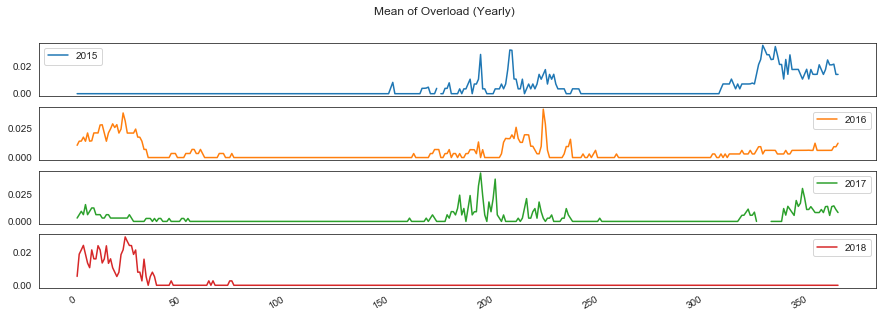

In [12]:
time_df = df.copy()
time_df = time_df.set_index('DDate')

mean_day = time_df.groupby(pd.Grouper(freq='D'))
day_df = mean_day['Target'].mean().to_frame(name = 'Mean').reset_index()
day_df['DDate'] = pd.to_datetime(day_df['DDate'], unit='d')
day_df = day_df.set_index('DDate')
day_df = day_df.reindex(pd.date_range("2015-01-01", "2018-12-31", freq='D'), fill_value=0)
                
groups = day_df.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for date, target in groups:
    years[date.year] = pd.Series(target['Mean'].values)

years.plot(subplots=True, legend=True, figsize=(15, 5), title='Mean of Overload (Yearly)')
plt.show()

<br>
<p style="font-size: 15px; color: #474747">At first glance, it does seem like that it follows some kind of seasonal change. But this could also be due to certain months when operations are closed. While close, the spikes in transformer overload do not seem to occur at exactly the same time of year.</p>

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">3.2.2</span> Checking for daily changes</h2>
<br>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000186C3078448>,
      dtype=object)

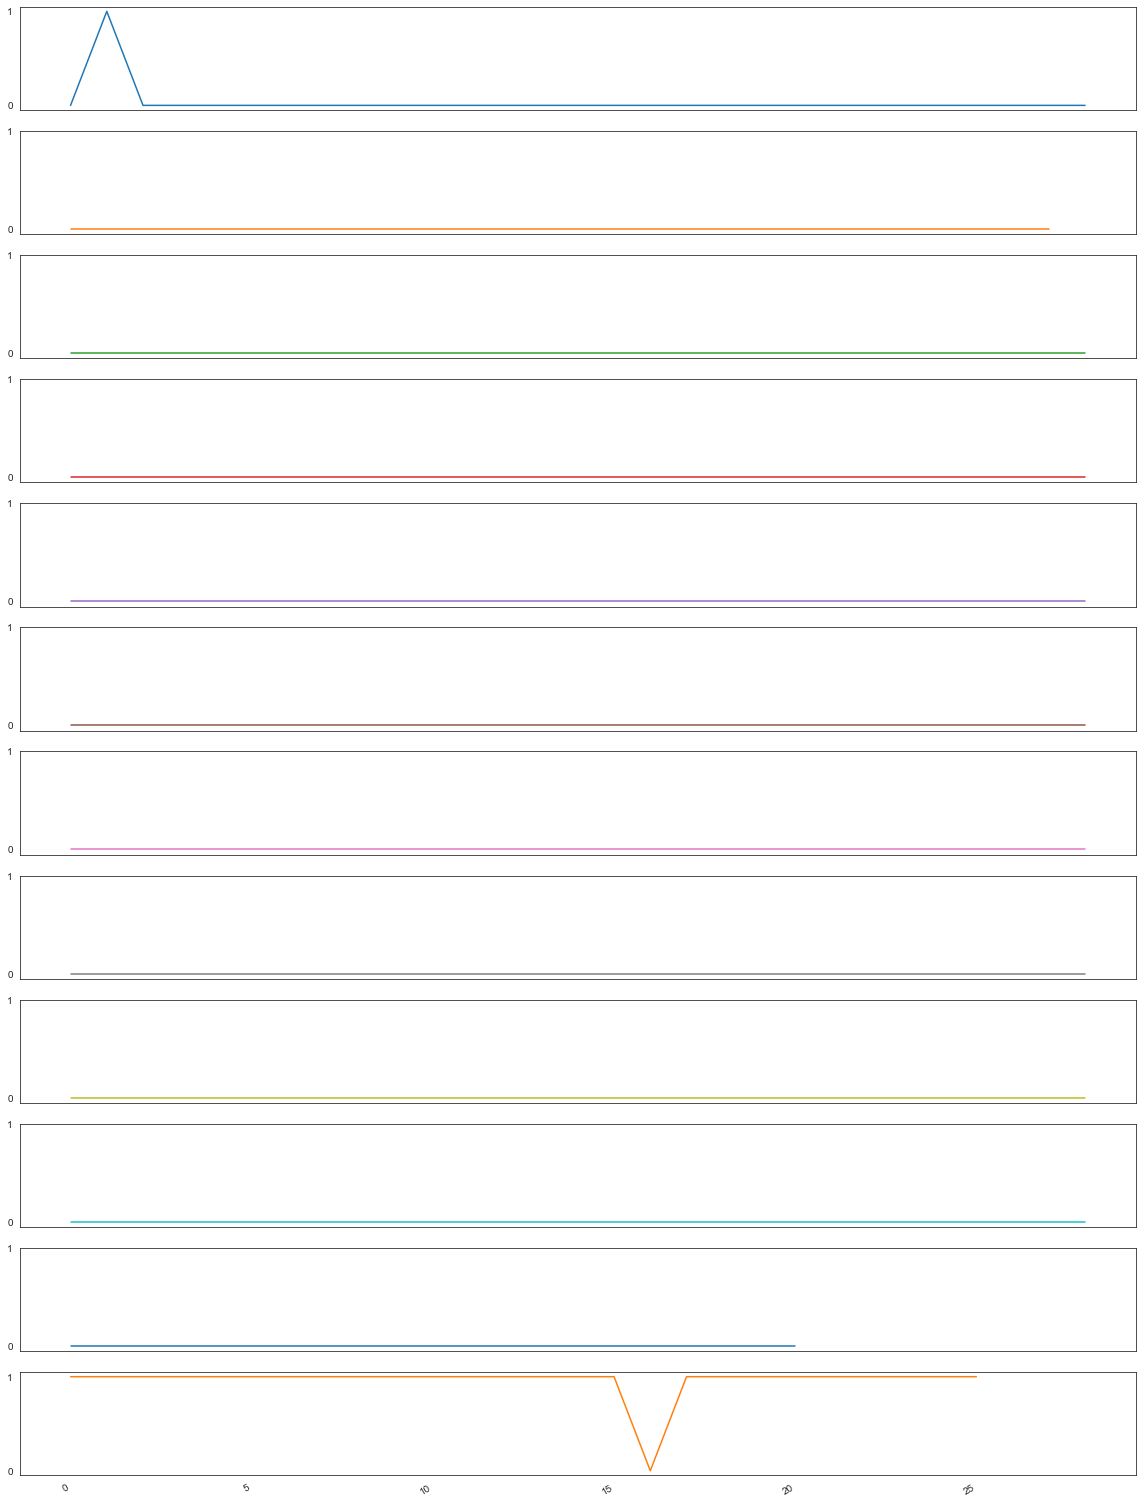

In [13]:
mean_day = mean_day.apply(lambda x: x) # converts it back into a Pandas DataFrame
mpb_287_df = mean_day[['Target', 'DTNumber']]
mpb_287_df = mpb_287_df.loc[(mean_day['DTNumber']=='MPB_287') & (mpb_287_df.index.year == 2017)]
mpb_287_df = mpb_287_df.drop(columns=['DTNumber'])
groups = mpb_287_df.groupby(pd.Grouper(freq='M'))

months = pd.DataFrame()

for date, target in groups:
    months[date.month] = pd.Series(target['Target'].values)
months.plot(legend=False, figsize=(20, 30), subplots=True, yticks=[0, 1])

<br>
<p style="font-size: 15px; color: #474747">What we discovered was that overload are extremely likely to occur simultaneously after one another. So if a transformer overloads on Day X, it is highly plausible to be overloaded on Day X+1. However, the predicting of the first day in which the transformer overloads is the real issue since time series bases its judgement on the previous day. Thus, after experimenting around, we've decided to not use time series classfication.</p>

<br><br><br>
<div style="background-color: #005284; padding-left: 20px; padding-top: 5px; padding-bottom: 30px;">
<h1 style="font-size: 55px; color:#dbe2eb;"><span style="opacity: 0.3;">4.</span> Feature Engineering</h1>
</div>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">4.1</span> Feature Construction</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br>
<ul style="font-size: 15px; color: #474747">
    <li>Feature construction is the process of transforming raw data into features that better represent the underlying problem to the predictive models.</li>
    <li style="margin-top: 20px;">This may or may not result in improved model accuracy on unseen data.</li>
</ul>
<br><br>


In [14]:
# datetime variables can be extracted into several features
df['day'] = df['DDate'].dt.day
df['month'] = df['DDate'].dt.month
pred_df['day'] = pred_df['DDate'].dt.day
pred_df['month'] = pred_df['DDate'].dt.month

# remove these since we no longer need them
df = df.drop(columns=['DDate'])
pred_df = pred_df.drop(columns=['DDate'])

# the range between max and min values can be a useful feature too
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
pred_df['TempRange'] = pred_df['MaxTemp'] - pred_df['MinTemp']

<br>
<p style="font-size: 15px; color: #474747">Before we continue on, we will need to declare our feature vector and target variable and further split them to our training and hold-out validation sets. It is important to do this step before any preprocessing as data leakage can occur if we do it after.</p>

In [15]:
X = df.drop(columns=['Target'])
y = df['Target']

In [16]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.15, stratify=y, random_state = 0)

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">4.2</span> Dimensionality Reduction</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br>
<ul style="font-size: 15px; color: #474747">
    <li>Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension (Wikipedia). Or in simpler words, we want to reduce the number of features in our dataset without losing any valuable information.</li>
    <li style="margin-top: 10px;">While it can greatly improve computation time, minimise chances of overfitting and obtain better results, it also carries the risk of valuable data loss and instead worsen results. So only carry it out when you're certained.</li>
</ul>
<br><br>

<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">4.2.1</span> Remove unrelated features</h2>
<br>

<ul style="font-size: 15px; color: #474747">
    <li>As seen <a style="text-decoration: none;" href="#3.1.2-Preview-dataset">above</a>, not all features given are useful to our objective. Let's go ahead and drop these.</li>
<br>

In [17]:
# Drop unnecessary features
X_train = X_train.drop(columns=['ID', 'UserNumber', 'UserName', 'EMANumber', 'Terminal', 'DTNumber'])
X_validation = X_validation.drop(columns=['ID', 'UserNumber', 'UserName', 'EMANumber', 'Terminal', 'DTNumber'])
pred_df = pred_df.drop(columns=['ID', 'UserNumber', 'UserName', 'EMANumber', 'Terminal', 'DTNumber']) 

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">4.3</span> Data Cleansing</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br>
<ul style="font-size: 15px; color: #474747">
    <li>Data cleansing is the process of correcting corrupt or inaccurate records from a dataset. This can refer to  
        <ul style="margin-top: 8px;">
            <li>Incomplete data.</li>
            <li style="margin-top: 5px;">Incorrect data.</li>
            <li style="margin-top: 5px;">Irrelevant parts of the data.</li>
        </ul>
    </li>
    <li style="margin-top: 10px;">These data are handled by either replacing, modifying, or deleting the dirty or coarse data.</li>
</ul>
<br><br>


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">4.3.1</span> Handling outliers with Robust Scaling</h2>
<br>

<ul style="font-size: 15px; color: #474747">
    <li>Scikit Learn's RobustScaler allows us to easily aggregate outliers based on the entire feature's quantile.</li>
<br>

In [18]:
def robust_scaling(df):
    
    robust = RobustScaler(quantile_range=(0, 0.8)) # the lower quantile is unset to prevent the 0 value data to be removed
    
    for col in df_opload['variable'].unique():
        robust.fit_transform(df[col].values.reshape(-1, 1))
        
    return df

X_train = robust_scaling(X_train)
X_validation = robust_scaling(X_validation)
pred_df = robust_scaling(pred_df)

<br>
<p style="font-size: 15px; color: #474747">Values that were above the 80th quantile should have been aggregated.</p>

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">4.3.2</span> Handling missing values with Imputation</h2>
<br>

<ul style="font-size: 15px; color: #474747">
    <li>Scikit Learn's SimpleImputer ensures all missing values are filled up based on the variable's mean, median etc. (based on user selection).</li>
<br>

In [19]:
from sklearn.impute import SimpleImputer

# fills missing values based on median
def simple_imputer(df):
    
    # Imput missing lines
    for col in ['MaxTemp', 'MinTemp', 'TempRange']:
        df[col] = SimpleImputer(missing_values = np.nan, strategy='median').fit_transform(df[col].values.reshape(-1, 1))
    
    return df

X_train = simple_imputer(X_train)
X_validation = simple_imputer(X_validation)
df = simple_imputer(df)
pred_df = simple_imputer(pred_df)

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">4.3.3</span> Categorical encoding with OHE</h2>
<br>

<ul style="font-size: 15px; color: #474747">
    <li>One-hot encoding maps a categorical feature, represented as a label index, to a binary vector with at most a single one-value indicating the presence of a specific feature value from among the set of all feature values.</li>
<br>

In [20]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df):
        
    # Get a new clean dataframe
    obj_df = df.select_dtypes(include=['object']).copy()
    enc_df = ''
    
    for col in list(obj_df):
        
        enc = OneHotEncoder(dtype=np.int, sparse=True, handle_unknown='ignore')
        enc_col_df = pd.DataFrame(enc.fit_transform(df[[col]]).toarray(), columns=enc.categories_)
        
        if enc_df:
            enc_df.update(enc_col_df)
        else:
            enc_df = enc_col_df.copy()
            
        df = df.drop(columns=[col])
            
    enc_df = df.join(enc_df)

    return enc_df
    
X_train = one_hot_encoding(X_train)
X_validation = one_hot_encoding(X_validation)
pred_df = one_hot_encoding(pred_df)

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">4.3.4</span> Handling imbalanced data with OneSidedSelection</h2>
<br>

<ul style="font-size: 15px; color: #474747">
    <li>One-Sided Selection, or OSS for short, is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule.</li>
    <li style="margin-top: 20px;">Specifically, Tomek Links are ambiguous points on the class boundary and are identified and removed in the majority class. The CNN method is then used to remove redundant examples from the majority class that are far from the decision boundary.</li>
<br>

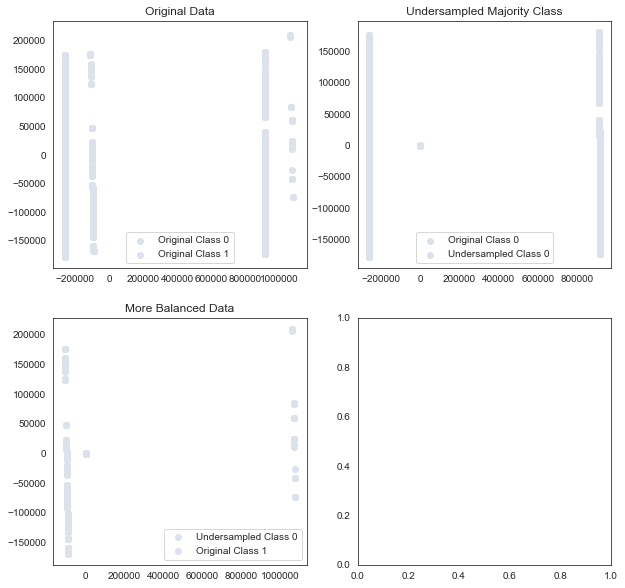

Not Overloaded: 
(13428,)
Overloaded: 
(1227,)


In [36]:
from imblearn.under_sampling import OneSidedSelection
from sklearn.decomposition import PCA

def enn_tomek(X, y):
    
    undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=50)
    resamp_X, resamp_y= undersample.fit_resample(X, y)
    
    # Transform the resampled data into principal components
    pca = PCA(n_components=2)
    resamp = pd.DataFrame(np.hstack((np.vstack(resamp_y), resamp_X)))

    df_num = df.select_dtypes(exclude=['object'])
    resamp_0 = resamp[resamp[0] == 0.0]
    resamp_1 = resamp[resamp[0] == 1.0]
    orig_0 = df_num[df_num.Target == 0]
    orig_1 = df_num[df_num.Target == 1]

    orig_no = pca.fit_transform(orig_0)
    orig_yes = pca.fit_transform(orig_1)
    resamp_no = pca.fit_transform(resamp_0)
    resamp_yes = pca.fit_transform(resamp_1)

    ono_x = orig_no[:, 0]
    ono_y = orig_no[:, 1]
    oyes_x = orig_yes[:, 0]
    oyes_y = orig_yes[:, 1]
    rno_x = resamp_no[:, 0]
    rno_y = resamp_no[:, 1]
    ryes_x = resamp_yes[:, 0]
    ryes_y = resamp_yes[:, 1]

    fig_undersample, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()

    axs[0].set_title('Original Data')
    axs[0].scatter(ono_x, ono_y, label='Original Class 0')
    axs[0].scatter(oyes_x, oyes_y, label='Original Class 1')
    axs[1].set_title('Undersampled Majority Class')
    axs[1].scatter(ono_x, ono_y, label='Original Class 0')
    axs[1].scatter(rno_x, rno_y, label='Undersampled Class 0')
    axs[2].set_title('More Balanced Data')
    axs[2].scatter(rno_x, rno_y, label='Undersampled Class 0')
    axs[2].scatter(oyes_x, oyes_y, label='Original Class 1')
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()

    plt.show()
    fig_undersample.savefig('images/plots/undersampleplot.png')
    
    return resamp_X, resamp_y

X_train, y_train = enn_tomek(X_train, y_train)


# show the reduced size of the majority class
not_overloaded = y_train.loc[y_train == 0]
overloaded = y_train.loc[y_train == 1]

print('Not Overloaded: ')
print(not_overloaded.shape)
print('Overloaded: ')
print(overloaded.shape)

<br><br><br>
<div style="background-color: #005284; padding-left: 20px; padding-top: 5px; padding-bottom: 30px;">
<h1 style="font-size: 55px; color:#dbe2eb;"><span style="opacity: 0.3;">5.</span> Training Model</h1>
</div>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.1</span> Introduction to the XGBoost Algorithm</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br><br>


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.1.1</span> Tree-based algorithms</h2><br>

<ul style="font-size: 15px; color: #474747">
    <li>Tree based algorithms have evolved over the years.</li>
    <li style="margin-top: 20px;">XGBoost belongs to a family of tree-based algorithms.</li>
    <li style="margin-top: 20px;">The chart below gives a good summary for the evolution of tree-based algorithms across the years</li>
<br><br>
<img style="width: 80%; float: left; margin-bottom:100px;" src="images/diagrams/tree-based-alg_history.jpg">


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.1.2</span> Bagging vs Boosting</h2><br>

<ul style="font-size: 15px; color: #474747">
    <li><strong>Bagging</strong> and <strong>Boosting</strong> are similar in that they are both ensemble techniques, where a set of weak learners are combined to create a strong learner that obtains better performance than a single one.</li>
    <li style="margin-top: 20px;">Ensemble learning helps to improve machine learning model performance by combining several models. This approach allows the production of better predictive performance compared to a single model.</li>
    <li style="margin-top: 20px;">The basic idea behind ensemble learning is to learn a set of classifiers (experts) and to allow them to vote. This diversification in Machine Learning is achieved by a technique called <strong>ensemble learning</strong>. The idea here is to train multiple models, each with the objective to predict or classify a set of results.</li>
    <li style="margin-top: 20px;">The main causes of error in learning are due to <strong>noise, bias and variance</strong>. Ensemble helps to minimize these factors. By using ensemble methods, we’re able to increase the stability of the final model and reduce the errors mentioned previously.</li>
    <li style="margin-top: 20px;"><strong>Bagging</strong> and <strong>Boosting</strong> are two types of ensemble learning techniques. These two decrease the variance of single estimate as they combine several estimates from different models. So the result may be a model with higher stability.
        <ul style="margin-top: 8px;">
            <li><strong>Bagging helps to decrease the model’s variance.</strong></li>
            <li style="margin-top: 5px;"><strong>Boosting helps to decrease the model’s bias.</strong></li>
        </ul>
    </li>
    <li style="margin-top: 20px;">To use Bagging or Boosting you must select a base learner algorithm. For example, if we choose a classification tree, Bagging and Boosting would consist of a pool of trees as big as we want as shown in the following diagram.</li>
<br><br>
<img style="width: 80%; float: left; margin-bottom:100px;" src="images/diagrams/baggingvsboosting.png">


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.1.3</span> Gradient Boosting</h2><br>

<ul style="font-size: 15px; color: #474747">
    <li>Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.</li>
    <li style="margin-top: 20px;">It builds the model in a stage-wise fashion like other boosting methods do and it generalizes them by allowing optimization of an arbitrary differentiable loss function.</li>
    <li style="margin-top: 20px;">The objective of any supervised learning algorithm is to define a loss function and minimise it. The same is true for Gradient Boosting algorithm.</li>
    <li style="margin-top: 20px;">Gradient boosted trees consider the special case where the simple model h is a decision tree.
</li>
    <li style="margin-top: 20px;">It can be depicted with the following diagram which is taken from XGBoost’s documentation.</li>
</ul>
<br><br>
<img style="width: 80%; float: left; margin-bottom:100px;" src="images/diagrams/gradient-boosting-trees.png">


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.1.4</span> Extreme Gradient Boosting (XGBoost)</h2><br>

<ul style="font-size: 15px; color: #474747">
    <li>XGBoost is one of the fastest implementations of gradient boosted trees. It does this by tackling one of the major inefficiencies of gradient boosted trees.</li>
    <li style="margin-top: 20px;">Consider the case where there are thousands of features, and therefore thousands of possible splits. Now, if we consider the potential loss for all possible splits to create a new branch we have thousands of potential splits and losses.</li>
    <li style="margin-top: 20px;">XGBoost tackles this inefficiency by looking at the distribution of features across all data points in a leaf and using this information to reduce the search space of possible feature splits.</li>
    <li style="margin-top: 20px;">Although XGBoost implements a few regularisation tricks, this speed up is by far the most useful feature of the library, allowing many hyperparameter settings to be investigated quickly.
</li>
    <li style="margin-top: 20px;">This is helpful because there are many hyperparameters to tune which are designed to limit overfitting.</li>
    <li style="margin-top: 20px;">Given below are some of the main features of the model
        <ul style="margin-top: 8px;">
            <li><strong>Sparsity:</strong> It accepts sparse input for tree booster and linear booster.</li>
            <li style="margin-top: 5px;"><strong>Customization:</strong> It supports customized objective and evaluation functions.</li>
            <li style="margin-top: 5px;"><strong>DMatrix:</strong> Its optimised data structure improves its performance and efficiency.</li>
        </ul>
    </li>
</ul>
    
<br><br>

<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.2</span> Implementing XGBoost in Python</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br><br>


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.2.1</span> Train the XGBoost Classifier</h2><br>

<ul style="font-size: 15px; color: #474747">
    <li>Now, its time to train the XGBoost Classifier!</li>
    <li style="margin-top: 20px;">I will discuss the different parameters XGBoost provide later on.</li>
<br><br>

In [37]:
# import XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# define data_dmatrix
dtrain = xgb.DMatrix(data=X_train,label=y_train)


# declare parameters
params = {
    'objective':'binary:logistic',
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators': 100
}     


# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.2.2</span> Hold-out Validation with XGBoost Classifier</h2><br>
<br>

In [41]:
# make predictions on hold-out validation data
pred = xgb_clf.predict(X_validation)

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.2.3</span> Check analysis report</h2><br>
<br>

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,\
                            precision_score, recall_score, precision_recall_curve

# Evaluation Matrix
print('Classification Report: \n')
print(classification_report(y_validation, pred))


# Confusion Matrix
cfn_matrix = confusion_matrix(y_validation, pred)
cfn_norm_matrix = np.array([[1.0/y_validation.value_counts()[0], 1.0/y_validation.value_counts()[0]],\
                            [1.0/y_validation.value_counts()[1], 1.0/y_validation.value_counts()[1]]])
norm_matrix = cfn_matrix * cfn_norm_matrix
print('\nConfusion Matrix: \n')
print(cfn_matrix)
print('\n')


# Evaluation Scores
print('Precision Score: ')
print(precision_score(y_validation, pred))
print('\nRecall Score: ')
print(recall_score(y_validation, pred))
print('\nf1 Score: ')
print(f1_score(y_validation, pred))
print('\nAUC Score: ')
print(roc_auc_score(y_validation, pred))

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52927
           1       0.91      0.84      0.88       217

    accuracy                           1.00     53144
   macro avg       0.95      0.92      0.94     53144
weighted avg       1.00      1.00      1.00     53144


Confusion Matrix: 

[[52909    18]
 [   34   183]]


Precision Score: 
0.9104477611940298

Recall Score: 
0.8433179723502304

f1 Score: 
0.8755980861244018

AUC Score: 
0.9214889406406999


<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.3</span> k-fold Cross Validation using XGBoost</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br>
<ul style="font-size: 15px; color: #474747">
    <li>To build more robust models with XGBoost, we should always perform k-fold cross validation.</li>
    <li style="margin-top: 20px;">In this way, we ensure that the original training dataset is used for both training and validation.</li>
    <li style="margin-top: 20px;">Also, each entry is used for validation just once.</li>
    <li style="margin-top: 20px;">XGBoost supports k-fold cross validation using the cv() method.
</li>
    <li style="margin-top: 20px;">For our CV, we will be specifying several parameters which are as follows
        <ul style="margin-top: 8px;">
            <li><strong>nfold:</strong> Specifies the number of cross-validation sets we want to build.</li>
            <li style="margin-top: 5px;"><strong>num_boost_round:</strong> Denotes the number of trees we build.</li>
            <li style="margin-top: 5px;"><strong>eval_metric:</strong> Performance evaluation metrics to be considered during CV.</li>
            <li style="margin-top: 5px;"><strong>as_pandas:</strong> Used to return the results in a pandas DataFrame.</li>
            <li style="margin-top: 5px;"><strong>early_stopping_rounds:</strong> Stops training of the model early if the hold-out metric does not improve for a given number of rounds.</li>
            <li style="margin-top: 5px;"><strong>seed:</strong> Used for reproducibility of results.</li>
        </ul>
    </li>
</ul>

<p style="font-size: 15px; color: #474747">We can use these parameters to build a k-fold cross-validation model by calling XGBoost's CV() method.
</p>

```python

# Cross validate with the specified parameters in 3 folds
cv_result = xgb.cv(params, dtrain=dtrain, num_boost_round=999, nfold=7, seed=21, stratified=True, 
                   as_pandas=True, early_stopping_rounds=10)
```
<br><br>


<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.4</span> Introduction to Bayesian Optimisation</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br><br>


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.4.1</span> Hyperparameter Tuning</h2><br>

<ul style="font-size: 15px; color: #474747">
    <li>Hyperparameters are certain values or weights that determine the learning process of an algorithm.</li>
    <li style="margin-top: 20px;">XGBoost provides large range of hyperparameters. We can leverage the maximum power of XGBoost by tuning its hyperparameters.</li>
    <li style="margin-top: 20px;">This kaggle tutorial provides a great introduction to BayesOpt and how it can be applied with XGBoost's hyperparameters: <a href="https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning#0.1">BayesOpt Tutorial</a></li>
<br><br>



<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.4.2</span> Frequentist vs Bayesian</h2><br>

<ul style="font-size: 15px; color: #474747">
    <li>Common hyperparameter tuning techniques such as <strong>GridSearch</strong> and <strong>Random Search</strong> roam the full space of available parameter values in an isolated way through many iterations (Frequentist Approach).</li>
    <li style="margin-top: 20px;">Tuning by means of these techniques can become a time-consuming challenge especially with large parameters spaces. The search space grows exponentially with the number of parameters tuned, whilst for each hyperparameter combination a model has to be trained, predictions have to be generated on the validation data, and the validation metric has to be calculated.</li>
    <li style="margin-top: 20px;">Hyperparameter tuning by means of Bayesian reasoning, or Bayesian Optimisation, can bring down the time spent to get to the optimal set of parameters — and bring better generalisation performance on the test set. It does this by taking into account information on the hyperparameter combinations it has seen thus far when choosing the hyperparameter set to evaluate next.</li>
<br><br>



<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.4.3</span>  Bayesian Optimisation</h2><br>

<ul style="font-size: 15px; color: #474747">
    <li><strong>Bayesian optimisation</strong> takes into account past evaluations when choosing the hyperparameter set to evaluate next.</li>
    <li style="margin-top: 20px;">By choosing its parameter combinations in an informed way, it enables itself to focus on those areas of the parameter space that it believes will bring the most promising validation scores.</li>
    <li style="margin-top: 20px;">This approach typically requires less iterations to get to the optimal set of hyperparameter values. Most notably because it disregards those areas of the parameter space that it believes won’t bring anything to the table.</li>
    <li style="margin-top: 20px;">This in turn limits the number of times a model needs to be trained for validation as solely those settings that are expected to generate a higher validation score are passed through for evaluation.</li>
    <li style="margin-top: 20px;">There are three main ingredients to Bayesian Optimisation
        <ul style="margin-top: 8px;">
            <li>The <strong>search space</strong> to sample parameters from</li>
            <li style="margin-top: 5px;">An <strong>objective function</strong></li>
            <li style="margin-top: 5px;">An <strong>acquistion function</strong></li>
        </ul>
    </li>
</ul>
<br><br>



<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.5</span> Implementing BayesOpt in Python</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br>
<ul style="font-size: 15px; color: #474747">
    <li><a style="text-decoration: none;" href="https://github.com/fmfn/BayesianOptimization">bayes_opt</a> is a Python library that enables us to tune hyperparameters by means of this technique and harvest potential efficiency gains</li>
</ul>
<br><br>


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.5.1</span>  Setting up BayesOpt</h2><br>
<br>



In [47]:
# Objective Function
def tune_xgb(max_depth, eta, min_child_weight, n_estimators, gamma):
    
    params = {
        'objective': 'binary:logistic',
        'n_estimators': int(n_estimators),
        'max_depth': int(max_depth),
        'eta': eta,
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'scale_pos_weight': 1,
        'verbosity': 0,
        'eval_metric': 'aucpr'
    } 

    # Cross validate with the specified parameters in 3 folds
    cv_result = xgb.cv(params, dtrain=dtrain, num_boost_round=999, nfold=7, seed=21,
                       stratified=True, as_pandas=True, early_stopping_rounds=10)
    
    return cv_result['test-aucpr-mean'].iloc[-1]

In [48]:
# Optimise Results
def optimise_xgb():

    # define paramter space for optimisation
    space = {
            'n_estimators': (200, 400),
            'max_depth': (9, 20),
            'eta': (0.01, 0.2),
            'min_child_weight': (0, 1),
            'gamma': (0, 1),
    }
    

    #Invoking the Bayesian Optimizer with the specified parameters to tune
    bo_xgb = BayesianOptimization(tune_xgb, pbounds=space)
    bo_xgb.maximize(init_points = 20, n_iter = 30, acq = "ei") # expected improvement is set as acq func

    # get the best results
    bestPR = bo_xgb.max['target']
    bestParams = bo_xgb.max['params']
    print(f'\n Best Precision Recall Found: {bestPR}')
    print(f'\n Best Parameters Found: {bestParams}')

    # Converting the max_depth and n_estimator values from float to int
    bestParams['max_depth'] = int(bestParams['max_depth'])
    bestParams['n_estimators'] = int(bestParams['n_estimators'])
    
    return bestParams

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.6</span> Final Validation</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br><br>


<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.6.1</span>  Hold-out Validation with XGBoost and BayesOpt</h2><br>
<br>



In [83]:
params = optimise_xgb()
xgb_final_clf = xgb.XGBClassifier(**params)
xgb_final_clf.fit(X_train, y_train)

|   iter    |  target   |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.9838   |  0.1682   |  0.814    |  15.89    |  0.8284   |  201.5    |
|  2        |  0.984    |  0.1475   |  0.1809   |  19.63    |  0.9328   |  389.6    |
|  3        |  0.984    |  0.08753  |  0.125    |  19.48    |  0.1828   |  211.4    |
|  4        |  0.9831   |  0.01892  |  0.9454   |  10.32    |  0.6835   |  375.6    |
|  5        |  0.9834   |  0.08497  |  0.2191   |  14.36    |  0.4256   |  306.0    |
|  6        |  0.9827   |  0.1816   |  0.7276   |  13.77    |  0.6824   |  352.1    |
|  7        |  0.9836   |  0.1426   |  0.4866   |  17.36    |  0.6008   |  337.0    |
|  8        |  0.984    |  0.186    |  0.01483  |  19.84    |  0.4637   |  391.9    |
|  9        |  0.9835   |  0.1122   |  0.6359   |  11.45    |  0.5059   |  292.2    |
|  10       |  0.9836   |  0.1967   |  0.4577   |  19.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.09180337284321342,
              gamma=0.07831570633113394, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0918033719,
              max_delta_step=0, max_depth=19,
              min_child_weight=0.19013617075276945, missing=nan,
              monotone_constraints='()', n_estimators=211, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [84]:
# make predictions on hold-out validation data
pred = xgb_final_clf.predict(X_validation)

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.6.2</span>  Check analysis report</h2><br>
<br>



In [85]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,\
                            precision_score, recall_score, precision_recall_curve

# Evaluation Matrix
print('Classification Report: \n')
print(classification_report(y_validation, pred))


# Confusion Matrix
cfn_matrix = confusion_matrix(y_validation, pred)
cfn_norm_matrix = np.array([[1.0/y_validation.value_counts()[0], 1.0/y_validation.value_counts()[0]],\
                            [1.0/y_validation.value_counts()[1], 1.0/y_validation.value_counts()[1]]])
norm_matrix = cfn_matrix * cfn_norm_matrix
print('\nConfusion Matrix: \n')
print(cfn_matrix)
print('\n')


# Evaluation Scores
print('Precision Score: ')
print(precision_score(y_validation, pred))
print('\nRecall Score: ')
print(recall_score(y_validation, pred))
print('\nf1 Score: ')
print(f1_score(y_validation, pred))
print('\nAUC Score: ')
print(roc_auc_score(y_validation, pred))

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52927
           1       0.95      0.88      0.91       217

    accuracy                           1.00     53144
   macro avg       0.97      0.94      0.96     53144
weighted avg       1.00      1.00      1.00     53144


Confusion Matrix: 

[[52916    11]
 [   26   191]]


Precision Score: 
0.9455445544554455

Recall Score: 
0.880184331797235

f1 Score: 
0.9116945107398569

AUC Score: 
0.9399882491831414


<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">5.6.3</span>  Feature importance with XGBoost</h2>
<br>
<ul style="font-size: 15px; color: #474747">
    <li>XGBoost provides a way to examine the importance of each feature in the original dataset within the model.
</li>
    <li style="margin-top: 20px;">It involves counting the number of times each feature is split on across all boosting trees in the model.</li>
    <li style="margin-top: 20px;">Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.</li>
    <li style="margin-top: 20px;">XGBoost has a plot_importance() function that helps us to achieve this task.</li>
    <li style="margin-top: 20px;">Then we can visualize the features that has been given the highest important score among all the features.</li>
    <li style="margin-top: 20px;">Thus XGBoost provides us a way to do feature selection.
</li>
</ul>
<br>
<br>



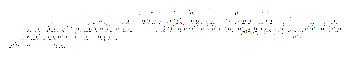

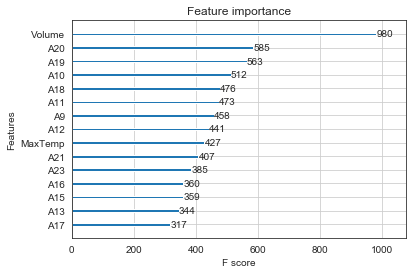

In [90]:
# Visualise Boosting Trees
xgb.plot_tree(xgb_final_clf, num_trees=0)

# Visualise Feature Importance
xgb.plot_importance(xgb_final_clf, max_num_features = 15)

# fig_xgb = plt.figure(figsize=(20, 10))
# ax_xgb0 = fig_xgb.add_subplot(2,1,1)
# ax_xgb1 = fig_xgb.add_subplot(2,1,2)

plt.show()
# fig_xgb.savefig('images/plots/xgbplot.png')

<br><br><br><br>
<div style="background-color: #005284; padding-left: 20px; padding-top: 5px; padding-bottom: 30px;">
<h1 style="font-size: 55px; color:#dbe2eb;"><span style="opacity: 0.3;">6.</span> Predictions</h1>
</div>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>

<br><br>
<h2 style="font-size: 30px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">6.1</span> Predicting with our final model</h2>
<br>
<a style="color: #005284; text-decoration: none; font-size: 16px;", href="#Table-of-Contents">Table of Contents</a>
<br>


In [101]:
pred_submission = xgb_final_clf.predict(pred_df)

submission_df = pd.read_csv('test_set.csv')
submission_df = submission_df[['ID', 'DTNumber', 'DDate']]
submission_df['Whether to heavy overload'] = pred_submission

submission_df.to_csv('prediction_final.csv', index=False)

<br><br>
<h2 style="font-size: 21px; font-weight: 600; color: #002553" class="toc_title"><span style="opacity: 0.2;">6.6.1</span>  Saving our model</h2><br>
<br>

In [103]:
import pickle
filename = 'overload_final.model'

# to save the model
pickle.dump(xgb_final_clf, open(filename, 'wb'))

# to load the saved model
# model = pickle.load(open(filename, 'rb'))